# Лабораторная работа №3
### Выделение трендовой составляющий временного ряда
## РИ-681223 Черепанов Александр
### Вариант №19

In [29]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from scipy import signal

from statsmodels.tsa import api as tsa
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Создадим временной ряд на основе следующих данных:

In [35]:
table = pd.read_excel('for_lab3.xlsx')
variant = 19
x = np.array(table.values[variant-1][1:])

Построим график заданного ряда на интервале (0, 1):

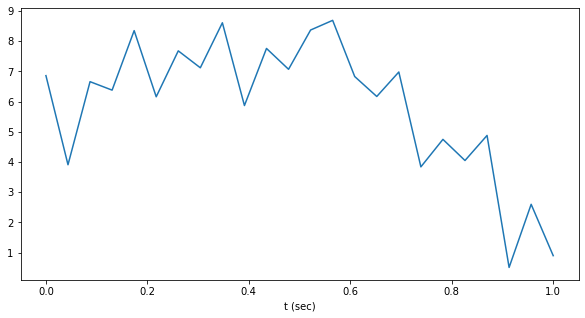

In [36]:
t = np.linspace(0, 1, x.shape[0])
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.xlabel('t (sec)');

Рассчитаем регрессионную модель тренда первого порядка, сначала произведем оценку регрессионной модели:

In [37]:
X = np.concatenate((np.ones((t.shape[0], 1)), t[:, np.newaxis]), axis=1)
Y = x[:, np.newaxis]
B = np.linalg.lstsq(X,Y)

Из этого результата **B** коэффициенты находятся в нулевом элементе.
Построим получившийся тренд:

[[ 8.0823]
 [-4.4146]]


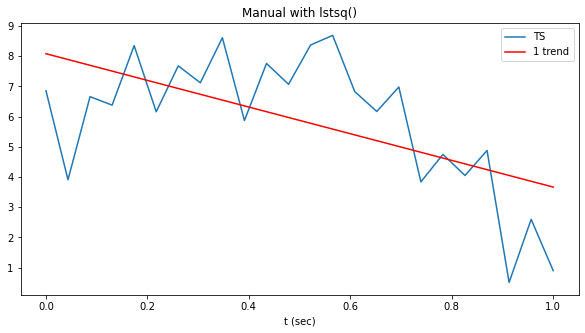

In [38]:
b_coefs = B[0]  # забираем из результата коэффициенты β
print(b_coefs)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS') # строим исходный ВР
plt.plot(t, b_coefs[0] + b_coefs[1] * t , 'r', label='1 trend') # строим его тренд
plt.xlabel('t (sec)');
plt.title('Manual with lstsq()')
plt.legend()
plt.show()

Так же посторим регрессионную кривую при помощи библиотечных функций. На основе построения полиномиальных кривых из numpy:

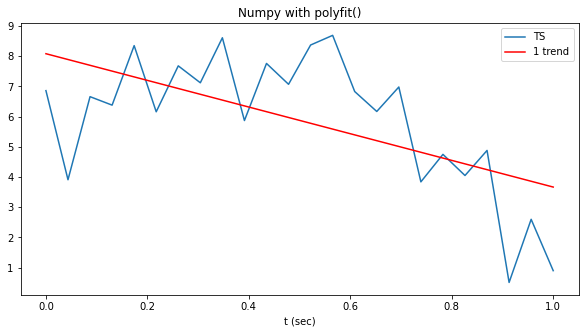

In [39]:
bb = np.polyfit(t, Y, 1) # полиномиальная кривая 1-го порядка

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, bb[1] + bb[0]*t, 'r', label='1 trend') # Внимание! Коэф. β в другом порядке
plt.xlabel('t (sec)');
plt.title('Numpy with polyfit()')
plt.legend()
plt.show()

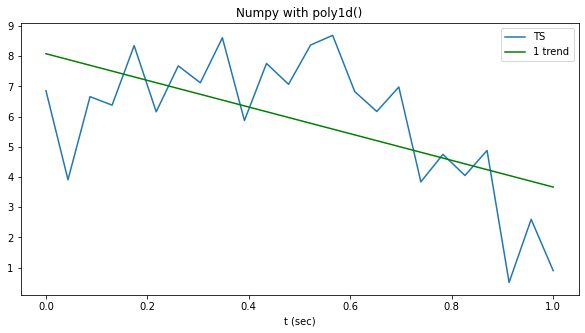

In [40]:
p = np.poly1d(bb.squeeze())  # создаем экземпляр полинома

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g', label='1 trend')
plt.xlabel('t (sec)');
plt.title('Numpy with poly1d()')
plt.legend()
plt.show()

На основе линейной регрессии из scipy.stats:

LinregressResult(slope=-4.414600000000001, intercept=8.0823, rvalue=-0.595338780528495, pvalue=0.0021471364054167805, stderr=1.2702467698693969)


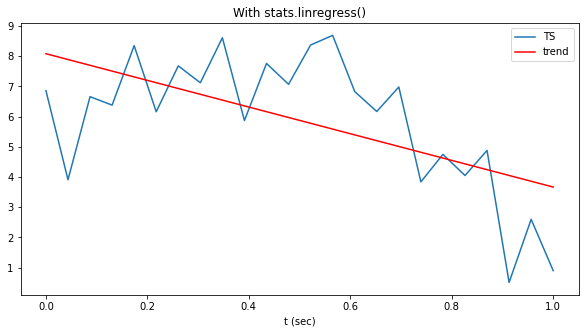

In [41]:
out = stats.linregress(t, Y.squeeze())
print(out) # выведет все коэффициенты и статистику регрессии

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')  # строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'r', label='trend')
plt.xlabel('t (sec)');
plt.title('With stats.linregress()')
plt.legend()
plt.show()

На основе подгонки кривых curve_fit из scipy.optimize:

[ 8.08230001 -4.41460003]
[[ 0.54953451 -0.80676343]
 [-0.80676343  1.61352685]]


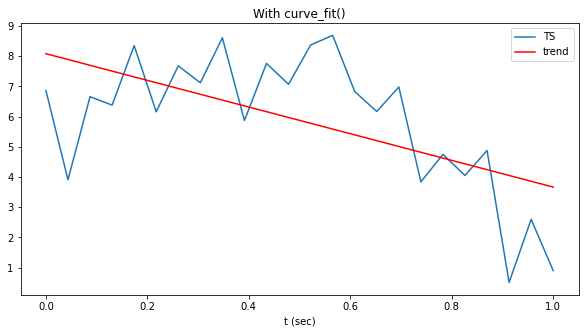

In [42]:
def func(t, b0, b1):  # описываем функцию тренда
  return b0 + b1 * t  # линейный тренд с 2 
  
popt, pcov = curve_fit(func, t, Y.squeeze()) # проводим подгонку МНК
print(popt)  # получаем коэффициенты b0 & b1
print(pcov)  # ковариационная матрица ошибок подгонки

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')  # строим график кривой вместе с трендом
plt.plot(t, popt[0] + popt[1]*t, 'r', label='trend')
plt.xlabel('t (sec)');
plt.title('With curve_fit()')
plt.legend()
plt.show()

На основе библиотеки sklearn:

[[-4.4146]]
[8.0823]
0.35442826360115565


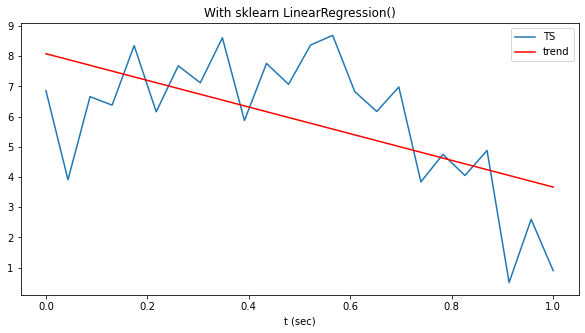

In [43]:
reg = LinearRegression().fit(t.reshape(-1,1), Y)
print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(t.reshape(-1,1), Y)) 
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,
# чем ближе она к 1.0, тем лучше тренд

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')  # строим график кривой вместе с трендом
plt.plot(t, reg.intercept_[0] + reg.coef_[0, 0]*t, 'r', label='trend')
plt.xlabel('t (sec)');
plt.title('With sklearn LinearRegression()')
plt.legend()
plt.show()

На основе statsmodel:

In [44]:
x_ = sm.add_constant(t.reshape(-1,1)) # создаем простую модель

# используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
smm = sm.OLS(Y, x_) 

res = smm.fit() # подгоняем параметры модели по МНК
print(res.params) # получаем результирующие коэффициенты

[ 8.0823 -4.4146]


Во всех случая получились одинаковые коэффициенты линейного тренда.

Аналогично построим модель тренда второй степени несколькими из ранее использованных способов: 

[[-17.58631469]
 [ 13.17171469]
 [  5.27868462]]


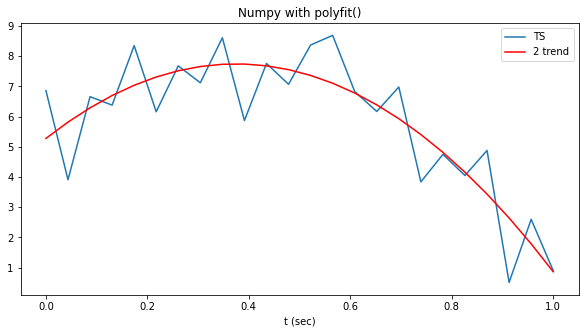

In [45]:
bb2 = np.polyfit(t, Y, 2) # полиномиальная кривая 2-го порядка
print(bb2)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, bb2[2] + t*bb2[1] + bb2[0]*t*t, 'r', label='2 trend')
plt.xlabel('t (sec)');
plt.title('Numpy with polyfit()')
plt.legend()
plt.show()

In [46]:
def func2(t, b0, b1, b2):  # описываем функцию тренда
  return b0 + b1*t  +  b2*t*t 
  
popt2, pcov2 = curve_fit(func2, t, Y.squeeze())
print(popt2)

[  5.27868464  13.17171449 -17.58631448]


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polyreg2_Pipeline = Pipeline([('pf', PolynomialFeatures(2)),
                              ('lr', LinearRegression())])
polyreg2_Pipeline.fit(t.reshape(-1,1), Y)

print(polyreg2_Pipeline.named_steps['lr'].coef_)
print(polyreg2_Pipeline.named_steps['lr'].intercept_) 

[[  0.          13.17171469 -17.58631469]]
[5.27868462]


Аналогично построим модель тренда третьей степени несколькими из ранее использованных способов: 

[[-5.48323137]
 [-9.36146762]
 [ 9.95122322]
 [ 5.51812251]]


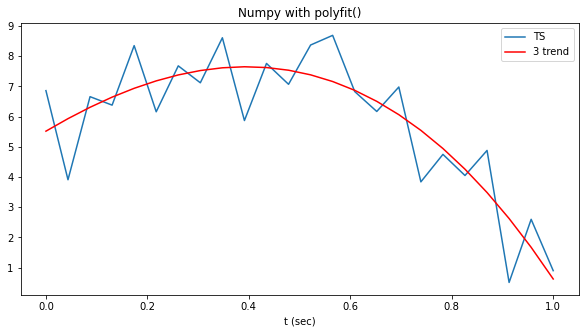

In [48]:
bb3 = np.polyfit(t, Y, 3) # полиномиальная кривая 2-го порядка
print(bb3)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, bb3[3] + t*bb3[2] + bb3[1]*t*t + bb3[0]*t*t*t, 'r', label='3 trend')
plt.xlabel('t (sec)');
plt.title('Numpy with polyfit()')
plt.legend()
plt.show()

In [49]:
def func3(t, b0, b1, b2, b3):  # описываем функцию тренда
  return b0 + b1*t + b2*t*t + b3*t*t*t
  
popt3, pcov3 = curve_fit(func3, t, Y.squeeze())
print(popt3)

[ 5.51812228  9.95122581 -9.36147365 -5.48322759]


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polyreg3_Pipeline = Pipeline([('pf', PolynomialFeatures(3)),
                              ('lr', LinearRegression())])
polyreg3_Pipeline.fit(t.reshape(-1,1), Y)

print(polyreg3_Pipeline.named_steps['lr'].coef_)
print(polyreg3_Pipeline.named_steps['lr'].intercept_) 

[[ 0.          9.95122322 -9.36146762 -5.48323137]]
[5.51812251]


Аналогично построим модель экспоненциального тренда несколькими из ранее использованных способов: 

[[-0.82393555]
 [ 5.170889  ]]


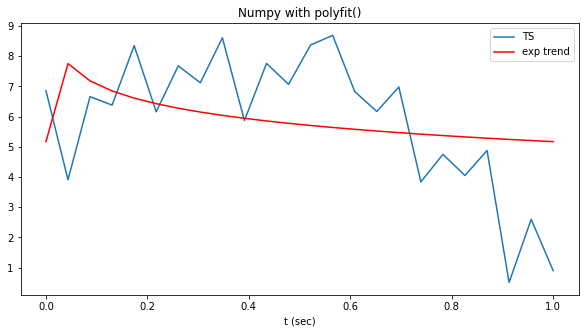

In [51]:
bbe = np.polyfit(np.nan_to_num(np.log(t), neginf=0), Y, 1)

print(bbe)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, bbe[1] + bbe[0]*np.nan_to_num(np.log(t), neginf=0), 'r', label='exp trend')
plt.xlabel('t (sec)');
plt.title('Numpy with polyfit()')
plt.legend()
plt.show()

In [52]:
popte, pcove = curve_fit(lambda t, b0, b1: b0 + b1*np.nan_to_num(np.log(t), neginf=0),  t, Y.squeeze())
print(popte)

[ 5.17088899 -0.82393555]


Нанесем все найденные тренды разной степени и модели нанесем на график:

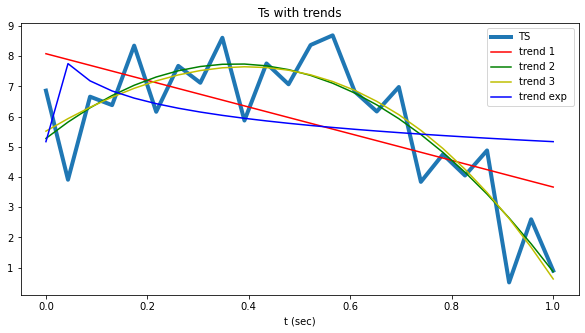

In [53]:
plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS', linewidth=4.0)
plt.plot(t, popt[0] + popt[1]*t, 'r', label='trend 1')
plt.plot(t, popt2[0] + popt2[1]*t + popt2[2]*t*t, 'g', label='trend 2')
plt.plot(t, popt3[0] + popt3[1]*t + popt3[2]*t*t + popt3[3]*t*t*t, 'y', label='trend 3')
plt.plot(t, popte[0] + popte[1]*np.nan_to_num(np.log(t), neginf=0), 'b', label='trend exp ')
plt.xlabel('t (sec)');
plt.title('Ts with trends')
plt.legend()
plt.show()

Построим тренд методом сглаживания:

In [54]:
def smooth(x, window_len):
  if window_len<3:
    return x
  s = np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
  w = np.ones(window_len, 'd')
  y = np.convolve(w/w.sum(), s, mode='same')
  return y[window_len:-window_len+1]

Вызовем эту функцию для сглаживания ряда по трем точкам:

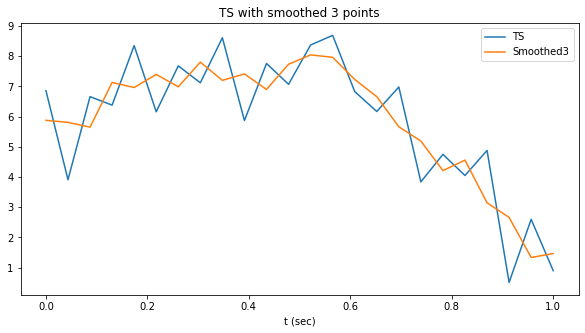

In [55]:
Smoothed_data = smooth(Y.squeeze(), 3) # сглаживание по 3 точкам

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, Smoothed_data, label='Smoothed3')
plt.xlabel('t (sec)');
plt.title('TS with smoothed 3 points')
plt.legend()
plt.show()

Для семи точек:

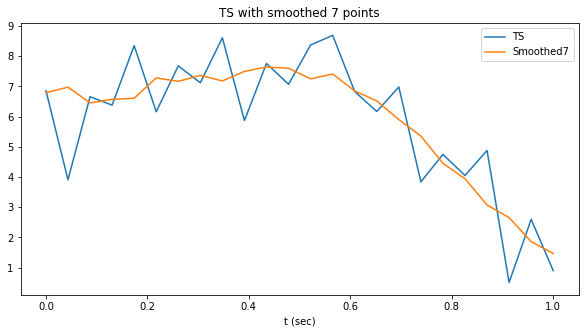

In [56]:
Smoothed_data = smooth(Y.squeeze(), 7)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, Smoothed_data, label='Smoothed7')
plt.xlabel('t (sec)');
plt.title('TS with smoothed 7 points')
plt.legend()
plt.show()

И для одиннадцати:

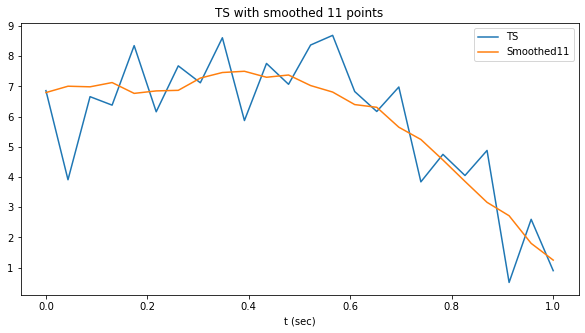

In [57]:
Smoothed_data = smooth(Y.squeeze(), 11)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, Smoothed_data, label='Smoothed11')
plt.xlabel('t (sec)');
plt.title('TS with smoothed 11 points')
plt.legend()
plt.show()

Построем собственную функцию сглаживания по трем точкам:

Text(0.5, 1.0, 'TS with smooth 3 points')

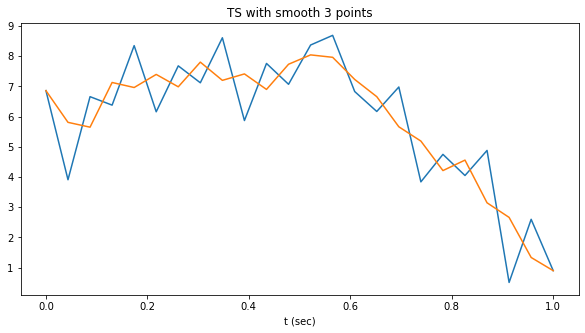

In [58]:
def smooth3 (x):
    tau=[]
    tau.append(x[0])
    for i in range (1, len(x) - 1):
        tau.append((x[i - 1] + x[i] + x[i + 1]) / 3)
    tau.append(x[len(x) - 1])
    return tau

plt.figure(figsize = (10, 5)) 
plt.plot(t, Y) 
plt.plot(t, smooth3(Y)) 
plt.xlabel('t (sec)');
plt.title('TS with smooth 3 points')

Построем собственную функцию сглаживания по семи точкам:

Text(0.5, 1.0, 'TS with smooth 7 points')

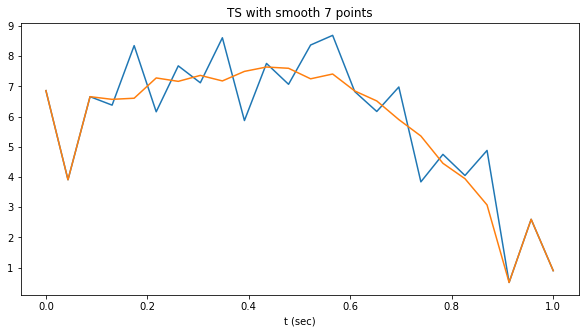

In [59]:
def smooth7 (x):
    tau=[]
    tau.append(x[0])
    tau.append(x[1])
    tau.append(x[2])
    for i in range (3, len(x) - 3):
        tau.append((x[i - 3] + x[i - 2] + x[i - 1] + x[i] + x[i + 1] + x[i + 2] + x[i + 3]) / 7)
    tau.append(x[len(x) - 3])
    tau.append(x[len(x) - 2])
    tau.append(x[len(x) - 1])
    return tau

plt.figure(figsize = (10, 5)) 
plt.plot(t, Y) 
plt.plot(t, smooth7(Y))
plt.xlabel('t (sec)');
plt.title('TS with smooth 7 points')

Построем  тренд  методом  экспоненциального сглаживания:

In [60]:
def exp_smooth(x, alpha):
  def req(x, num, alpha):
    if (num == 0):
      return x.mean()
    return (1-alpha)*req(x, num-1, alpha) + alpha*x[num]

  if (alpha < 1 and alpha > 0):
    return [req(x, i, alpha) for i in range(x.shape[0])]
  else:
    raise Exception('alpha must be in range (0, 1)')

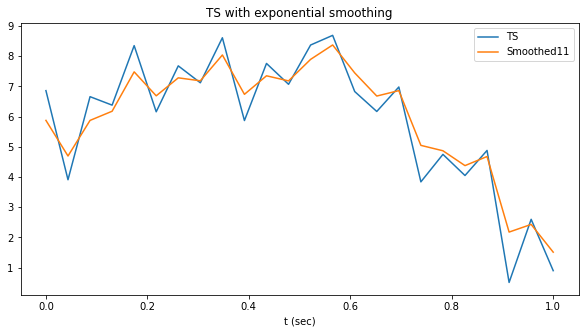

In [61]:
Smoothed_data = exp_smooth(Y.squeeze(), 0.6)

plt.figure(figsize = (10, 5))
plt.plot(t, Y, label='TS')
plt.plot(t, Smoothed_data, label='Smoothed11')
plt.xlabel('t (sec)');
plt.title('TS with exponential smoothing')
plt.legend()
plt.show()